In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

train_file_path = '/kaggle/input/road-segment-identification/Train.csv'
test_file_path = '/kaggle/input/road-segment-identification/Test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

train_df_head = train_df.head()
test_df_head = test_df.head()

train_df_head

,Image_ID,Target
0,ID_0073qfb8,0
1,ID_00gy3vH2,1
2,ID_00uB3UFr,0
3,ID_012xZpNw,1
4,ID_014GgMRb,1


In [3]:
test_df_head

,Image_ID
0,ID_01c6i2wd
1,ID_03sPqBLY
2,ID_06ZKUQFl
3,ID_06gzqIwK
4,ID_08kWat36


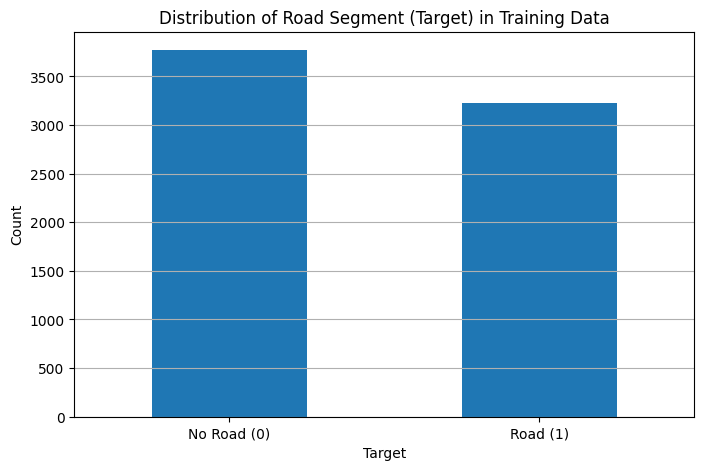

Target
1    3771
0    3229
Name: count, dtype: int64

In [4]:
import matplotlib.pyplot as plt

target_distribution = train_df['Target'].value_counts()

plt.figure(figsize=(8, 5))
target_distribution.plot(kind='bar')
plt.title('Distribution of Road Segment (Target) in Training Data')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Road (0)', 'Road (1)'], rotation=0)
plt.grid(axis='y')

plt.show()

target_distribution

In [5]:
subfolder_path = '/kaggle/input/road-segment-identification/Images/Images'
subfolder_files = os.listdir(subfolder_path)
subfolder_files[:5]

['ID_ChyT028f.tif',
 'ID_sWog5Kas.tif',
 'ID_3lsjZVdt.tif',
 'ID_wPzhUbjW.tif',
 'ID_kTa6WTWN.tif']

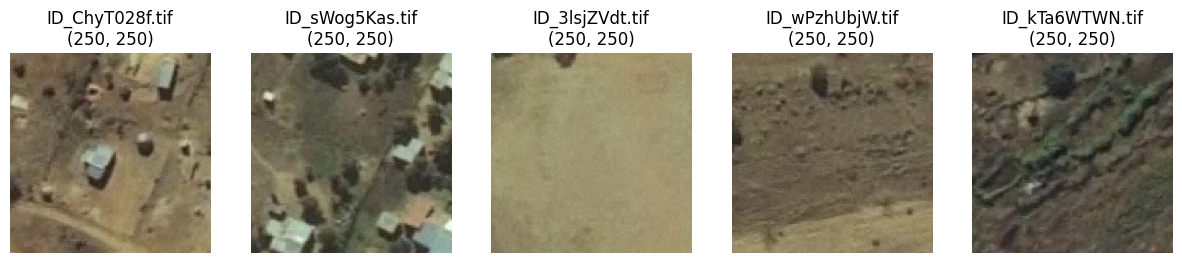

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

def display_sample_images(image_files, folder_path, num_samples=5):
    plt.figure(figsize=(15, 10))

    for i, file_name in enumerate(image_files[:num_samples]):
        image_path = os.path.join(folder_path, file_name)
        image = Image.open(image_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f'{file_name}\n{image.size}')
        plt.axis('off')

    plt.show()


display_sample_images(subfolder_files, subfolder_path)

In [7]:
target_distribution = train_df['Target'].value_counts()
target_distribution_percentage = train_df['Target'].value_counts(normalize=True) * 100
print(target_distribution)
print(target_distribution_percentage)

Target
1    3771
0    3229
Name: count, dtype: int64
Target
1    53.871429
0    46.128571
Name: proportion, dtype: float64


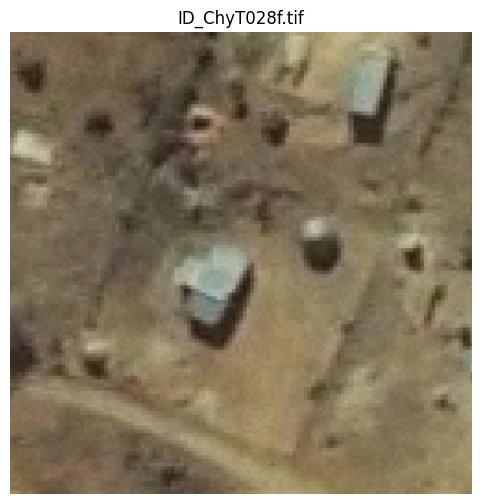

Image: ID_ChyT028f.tif
Mean Colors (RGB): [125.027328 111.304208  85.638032]
Standard Deviation of Colors (RGB): [26.00982255 26.17322879 22.28575085]



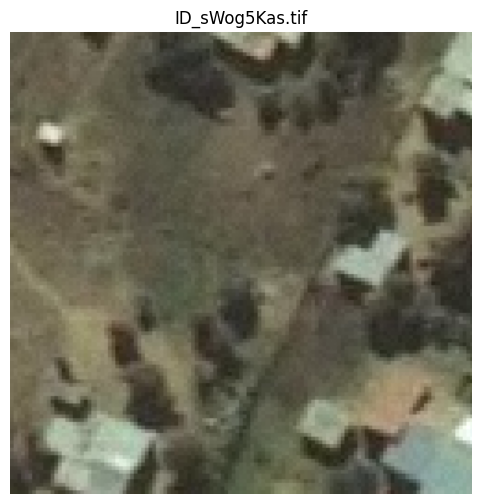

Image: ID_sWog5Kas.tif
Mean Colors (RGB): [100.173408  98.16232   79.856784]
Standard Deviation of Colors (RGB): [32.31540032 33.95693561 31.11129212]



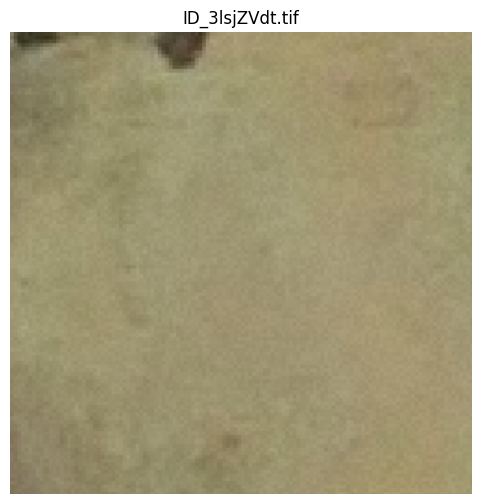

Image: ID_3lsjZVdt.tif
Mean Colors (RGB): [156.12984  146.893776 110.129328]
Standard Deviation of Colors (RGB): [11.0340646  10.59222491  8.92956764]



In [8]:
import numpy as np

def analyze_image_properties(image_files, folder_path, num_samples=3):
    for i, file_name in enumerate(image_files[:num_samples]):
        image_path = os.path.join(folder_path, file_name)
        image = Image.open(image_path)
        image_array = np.array(image)

        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.title(file_name)
        plt.axis('off')
        plt.show()

        mean_colors = np.mean(image_array, axis=(0, 1))
        std_colors = np.std(image_array, axis=(0, 1))
        print(f"Image: {file_name}")
        print(f"Mean Colors (RGB): {mean_colors}")
        print(f"Standard Deviation of Colors (RGB): {std_colors}\n")


analyze_image_properties(subfolder_files, subfolder_path)

# Texture analysis using Grey Level Co-occurrence Matrix (GLCM)

In [9]:
!pip install --upgrade scipy scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 43.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 17.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [10]:
!pip uninstall scikit-image -y

Found existing installation: scikit-image 0.22.0
Uninstalling scikit-image-0.22.0:
  Successfully uninstalled scikit-image-0.22.0


In [11]:
!pip uninstall scikit-image -y
!pip install scikit-image


  Using cached scikit_image-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.7 MB)

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


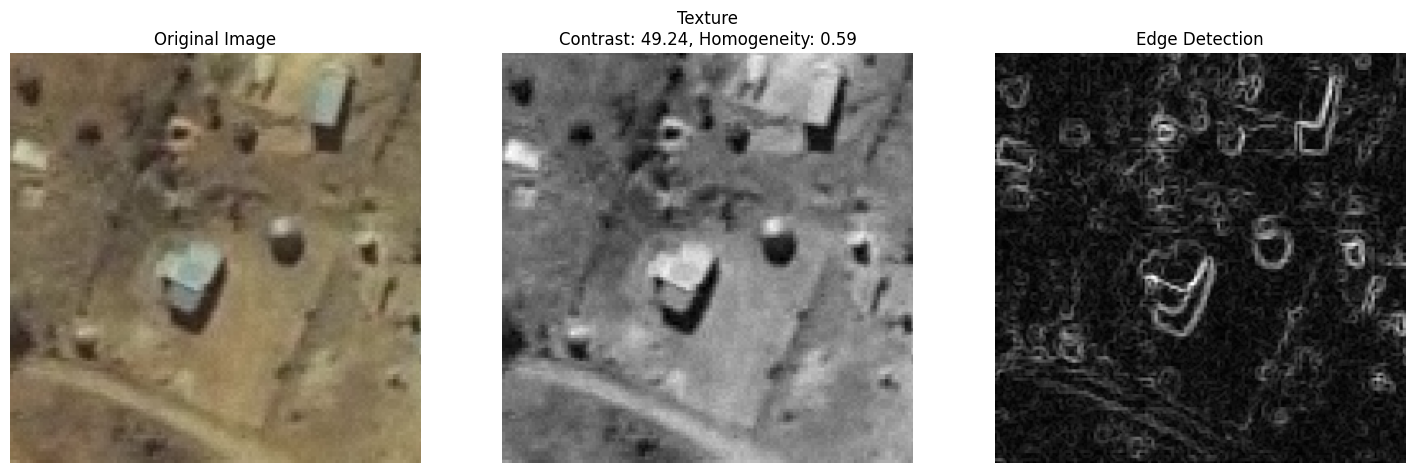

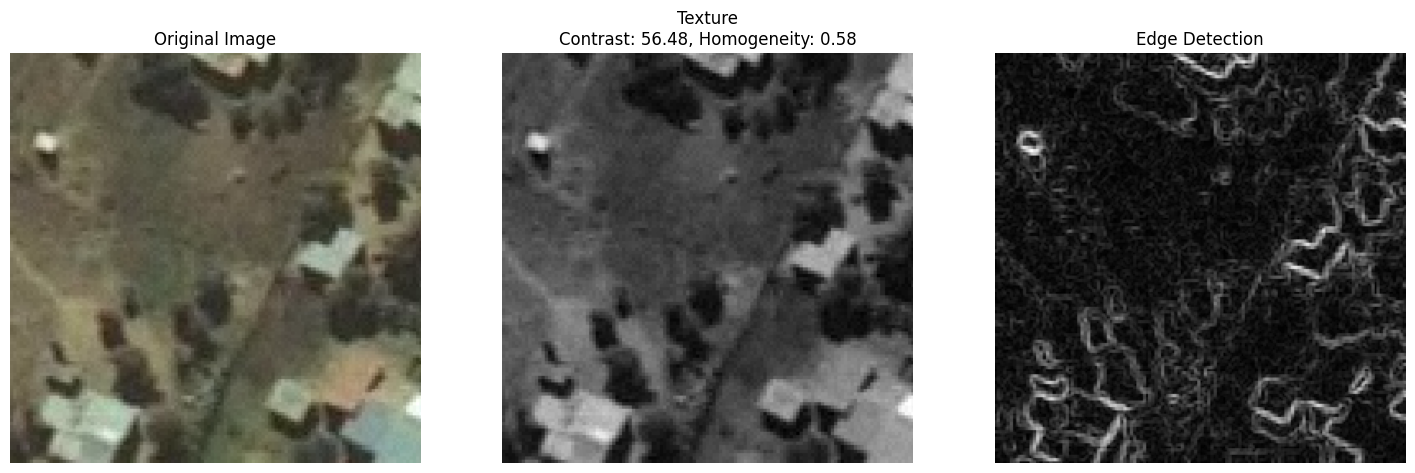

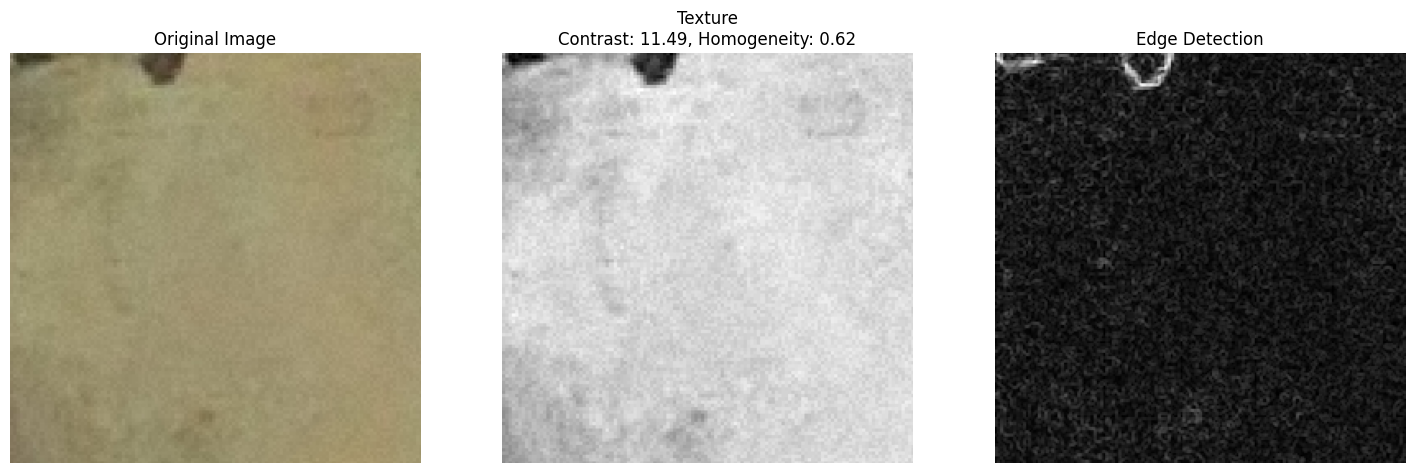

In [12]:
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage.filters import sobel

def texture_and_edge_analysis(image_files, folder_path, num_samples=3):
    for i, file_name in enumerate(image_files[:num_samples]):
        image_path = os.path.join(folder_path, file_name)
        image = Image.open(image_path)
        image_array = np.array(image)

        gray_image = rgb2gray(image_array)
        
        glcm = graycomatrix((gray_image * 255).astype('uint8'), distances=[1], angles=[0], symmetric=True, normed=True)
        texture_contrast = graycoprops(glcm, 'contrast')[0, 0]
        texture_homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

        # Edge detection using Sobel filter
        edges = sobel(gray_image)

        # Plotting the results
        plt.figure(figsize=(18, 6))

        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')

        # Texture
        plt.subplot(1, 3, 2)
        plt.imshow(gray_image, cmap='gray')
        plt.title(f'Texture\nContrast: {texture_contrast:.2f}, Homogeneity: {texture_homogeneity:.2f}')
        plt.axis('off')

        # Edges
        plt.subplot(1, 3, 3)
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Detection')
        plt.axis('off')

        plt.show()


texture_and_edge_analysis(subfolder_files, subfolder_path)

# Histograms for a few sample images

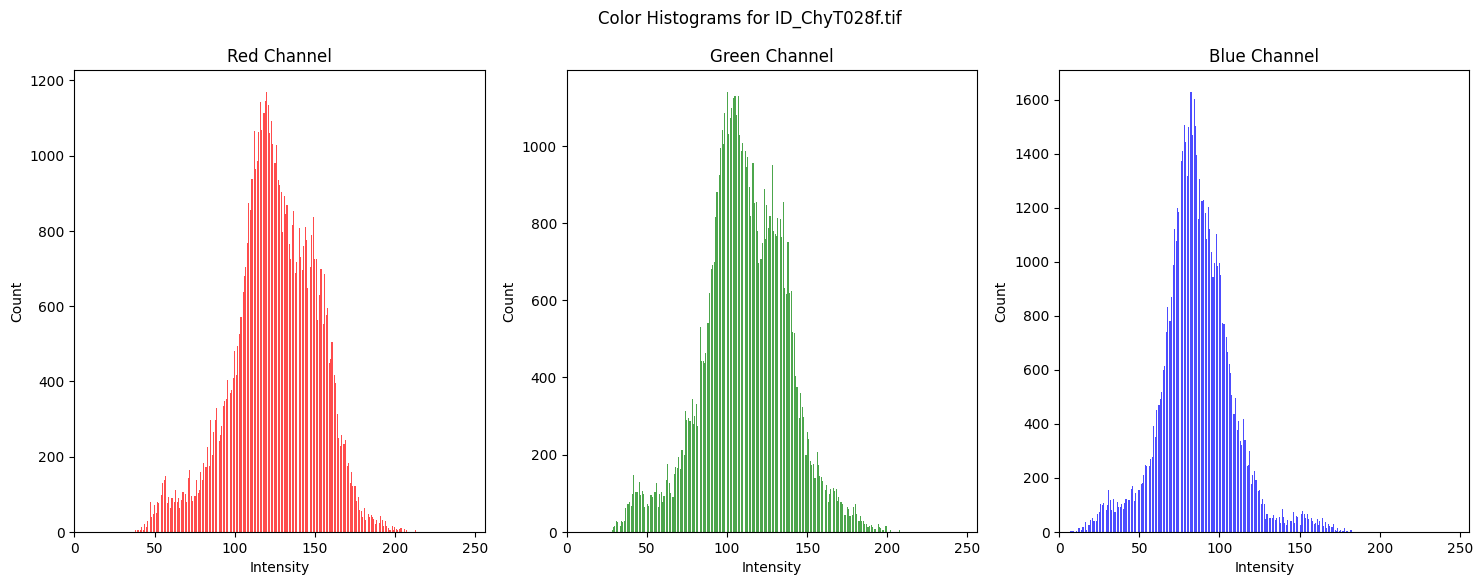

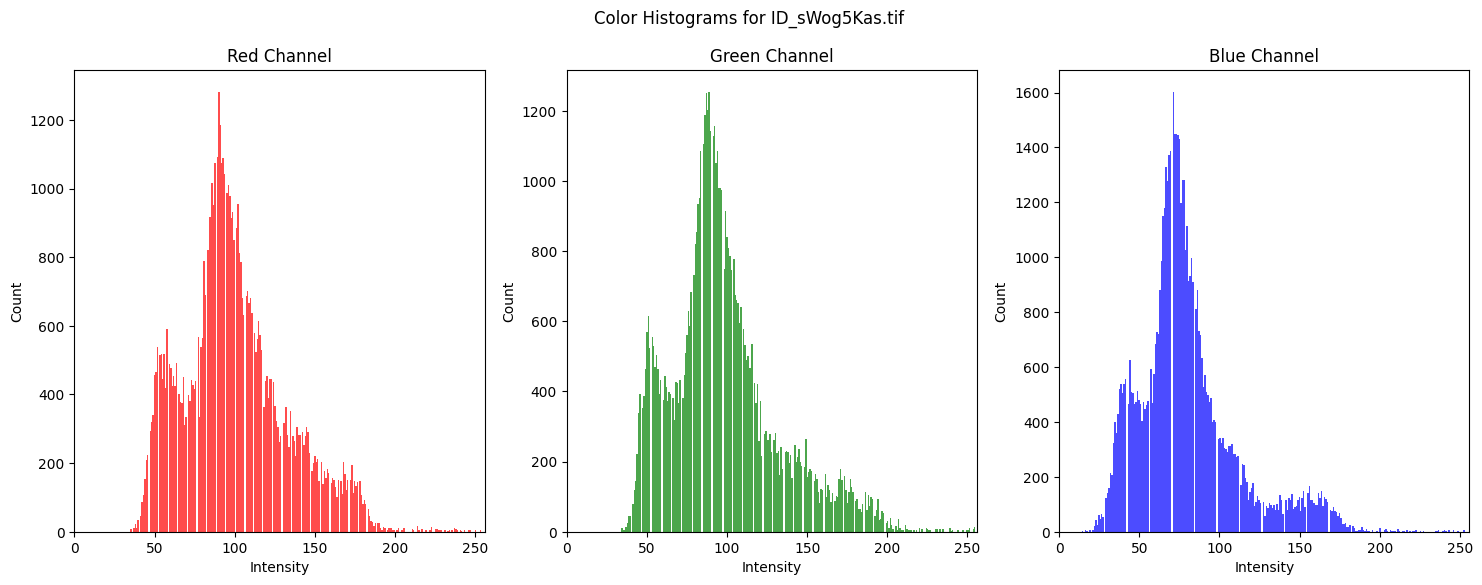

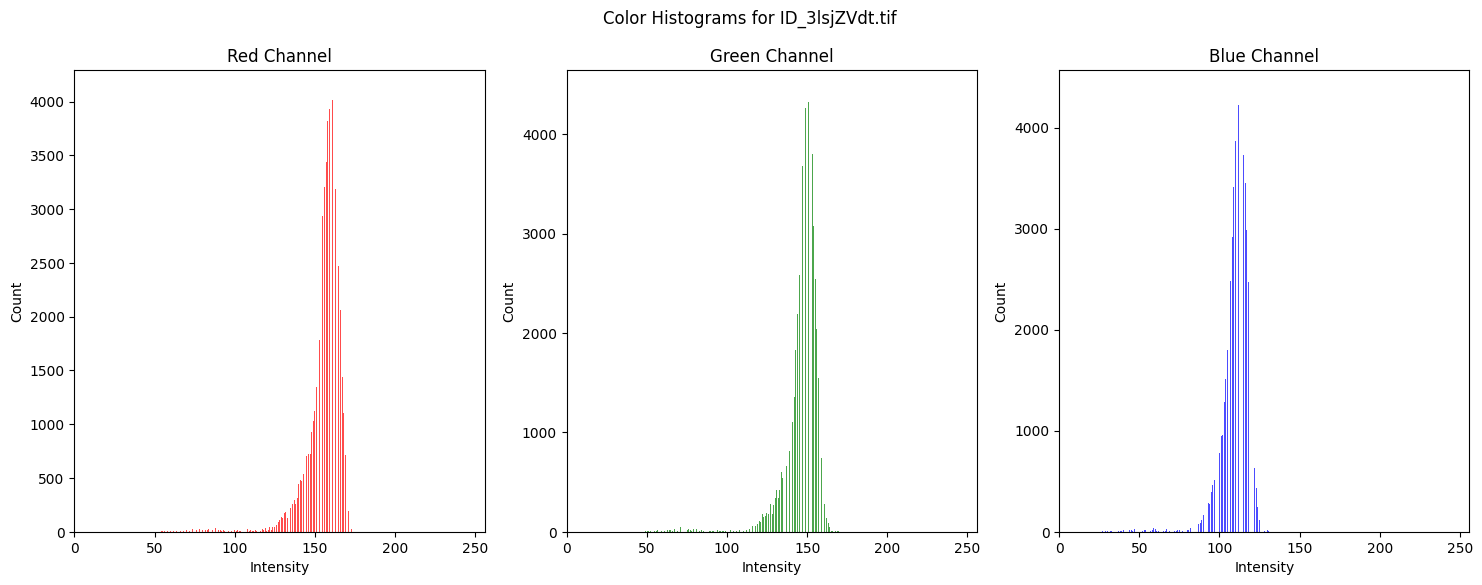

In [13]:
def plot_color_histograms(image_files, folder_path, num_samples=3):
    for i, file_name in enumerate(image_files[:num_samples]):
        image_path = os.path.join(folder_path, file_name)
        image = Image.open(image_path)
        image_array = np.array(image)

       
        plt.figure(figsize=(18, 6))
        plt.suptitle(f'Color Histograms for {file_name}')

        for j, color in enumerate(['Red', 'Green', 'Blue']):
            plt.subplot(1, 3, j + 1)
            plt.hist(image_array[:, :, j].ravel(), bins=256, color=color.lower(), alpha=0.7)
            plt.title(f'{color} Channel')
            plt.xlabel('Intensity')
            plt.ylabel('Count')
            plt.xlim([0, 256])
        
        plt.show()

plot_color_histograms(subfolder_files, subfolder_path)

# Extract HOG features

In [14]:
# from PIL import Image
# import numpy as np
# import os
# from skimage.feature import hog
# from skimage.color import rgb2gray
# import matplotlib.pyplot as plt


# subfolder_path = '/kaggle/input/road-segment-identification/Images/Images'
# subfolder_files = os.listdir(subfolder_path)
# sample_image_path = os.path.join(subfolder_path, subfolder_files[0])

# def analyze_image_hog(image_path, visualize=True):
#     # Read the image
#     image = Image.open(image_path)
#     image_array = np.array(image)
#     gray_image = rgb2gray(image_array)

#     fd, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
#                         cells_per_block=(1, 1), visualize=visualize)

#     # Display the original and HOG image
#     if visualize:
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

#         ax1.axis('off')
#         ax1.imshow(image, cmap=plt.cm.gray)
#         ax1.set_title('Original Image')

#         ax2.axis('off')
#         ax2.imshow(hog_image, cmap=plt.cm.gray)
#         ax2.set_title('Histogram of Oriented Gradients')
#         plt.show()

#     return fd


# hog_features = analyze_image_hog(sample_image_path)

# Histogram of Oriented Gradients (HOG) Feature Extraction

In [15]:
# from skimage.feature import hog
# from skimage.color import rgb2gray
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# def analyze_image_hog(image_path, visualize=True):
#     image = Image.open(image_path)
#     image_array = np.array(image)
#     gray_image = rgb2gray(image_array)

#     fd, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
#                         cells_per_block=(1, 1), visualize=visualize, channel_axis=-1)

#     if visualize:
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
#         ax1.axis('off')
#         ax1.imshow(image, cmap=plt.cm.gray)
#         ax1.set_title('Original Image')
#         ax2.axis('off')
#         ax2.imshow(hog_image, cmap=plt.cm.gray)
#         ax2.set_title('HOG Image')
#         plt.show()

#     return fd

In [16]:
# def plot_color_histogram(image_path):
#     image = Image.open(image_path)
#     image_array = np.array(image)

#     plt.figure(figsize=(18, 6))
#     for i, color in enumerate(['Red', 'Green', 'Blue']):
#         plt.subplot(1, 3, i + 1)
#         plt.hist(image_array[:, :, i].ravel(), bins=256, color=color.lower(), alpha=0.7)
#         plt.title(f'{color} Channel')
#         plt.xlabel('Intensity')
#         plt.ylabel('Count')
#         plt.xlim([0, 256])
#     plt.show()


In [17]:
# from skimage.filters import sobel

# def detect_edges(image_path):
#     image = Image.open(image_path)
#     gray_image = rgb2gray(np.array(image))
#     edges = sobel(gray_image)

#     plt.figure(figsize=(6, 6))
#     plt.imshow(edges, cmap='gray')
#     plt.title('Edge Detection')
#     plt.axis('off')
#     plt.show()


In [18]:
# def analyze_image_hog_modified(image_path, visualize=True):
#     image = Image.open(image_path)
#     image_array = np.array(image)
#     gray_image = rgb2gray(image_array)

#     # Extract HOG features
#     fd, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
#                         cells_per_block=(1, 1), visualize=visualize)

#     if visualize:
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

#         ax1.axis('off')
#         ax1.imshow(image, cmap=plt.cm.gray)
#         ax1.set_title('Original Image')

#         ax2.axis('off')
#         ax2.imshow(hog_image, cmap=plt.cm.gray)
#         ax2.set_title('Histogram of Oriented Gradients')
#         plt.show()

#     return fd

# hog_features = analyze_image_hog_modified(sample_image_path)

# Local Binary Pattern (LBP) for Texture Analysis

In [19]:
# from skimage.feature import local_binary_pattern
# from skimage import io

# def analyze_image_lbp(image_path, visualize=True):
#     image = io.imread(image_path)
#     gray_image = rgb2gray(image)

#     # Settings for LBP
#     radius = 3
#     n_points = 8 * radius

#     lbp = local_binary_pattern(gray_image, n_points, radius, method="uniform")

#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image, cmap='gray')
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(lbp, cmap='gray')
#         plt.title('Local Binary Pattern')
#         plt.axis('off')
#         plt.show()

#     return lbp

# analyze_image_lbp(sample_image_path, visualize=True)

# Gabor Filters for Texture and Edge Analysis

In [20]:
# from skimage.filters import gabor

# def analyze_image_gabor(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     gabor_response, _ = gabor(image, frequency=0.6)

#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image, cmap='gray')
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(gabor_response, cmap='gray')
#         plt.title('Gabor Filter Response')
#         plt.axis('off')
#         plt.show()

#     return gabor_response

# analyze_image_gabor(sample_image_path, visualize=True)

# Image Sharpening

In [21]:
# from skimage.filters import gabor

# def analyze_image_gabor(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     gabor_response, _ = gabor(image, frequency=0.6)

#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image, cmap='gray')
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(gabor_response, cmap='gray')
#         plt.title('Gabor Filter Response')
#         plt.axis('off')
#         plt.show()

#     return gabor_response

# analyze_image_gabor(sample_image_path, visualize=True)

# Fourier Transform for Frequency Analysis

In [22]:
# from numpy.fft import fft2, fftshift
# import matplotlib.cm as cm

# def apply_fourier_transform(image_path):
#     image = Image.open(image_path)
#     gray_image = rgb2gray(np.array(image))
#     f_transform = fftshift(fft2(gray_image))

#     # Display the Fourier Transform
#     plt.figure(figsize=(6, 6))
#     plt.imshow(np.log(abs(f_transform)), cmap=cm.gray)
#     plt.title('Fourier Transform')
#     plt.axis('off')
#     plt.show()

#     return f_transform
# apply_fourier_transform(sample_image_path)

#  Principal Component Analysis (PCA) for Dimensionality Reduction

In [23]:
# from sklearn.decomposition import PCA

# def apply_pca(image_path):
#     image = Image.open(image_path)
#     image_array = np.array(image)
#     original_shape = image_array.shape
#     flattened_image = image_array.reshape(-1, 3)

#     pca = PCA(n_components=3)
#     reduced_data = pca.fit_transform(flattened_image)
#     reduced_image = reduced_data.reshape(original_shape)

#     plt.figure(figsize=(6, 6))
#     plt.imshow(reduced_image.astype(int))
#     plt.title('Image after PCA')
#     plt.axis('off')
#     plt.show()

#     return reduced_data
# apply_pca(sample_image_path)

# Image Blurring (Gaussian Blur)

In [24]:
# from skimage.filters import gaussian

# def apply_gaussian_blur(image_path):
#     image = Image.open(image_path)
#     image_array = np.array(image)
    
#     blurred_image = gaussian(image_array, sigma=2)
#     plt.figure(figsize=(6, 6))
#     plt.imshow(blurred_image)
#     plt.title('Blurred Image')
#     plt.axis('off')
#     plt.show()

#     return blurred_image

# apply_gaussian_blur(sample_image_path)

# Contrast Adjustment

In [25]:
# from skimage import exposure

# def adjust_contrast(image_path, visualize=True):
#     # Load the image
#     image = Image.open(image_path)
#     image_array = np.array(image)

#     # Adjust contrast
#     adjusted_image = exposure.equalize_adapthist(image_array, clip_limit=0.03)

#     # Visualize the result
#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image_array)
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(adjusted_image)
#         plt.title('Contrast Adjusted Image')
#         plt.axis('off')
#         plt.show()

#     return adjusted_image
# adjust_contrast(sample_image_path, visualize=True)

# Image Binarization

In [26]:
# from skimage.filters import threshold_otsu

# def binarize_image(image_path, visualize=True):
#     image = Image.open(image_path)
#     gray_image = rgb2gray(np.array(image))
    
#     # Apply Otsu's thresholding
#     thresh = threshold_otsu(gray_image)
#     binary_image = gray_image > thresh

#     # Visualize the result
#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(gray_image, cmap='gray')
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(binary_image, cmap='gray')
#         plt.title('Binarized Image')
#         plt.axis('off')
#         plt.show()

#     return binary_image
# binarize_image(sample_image_path, visualize=True)

# Morphological Operations

In [27]:
# from skimage.morphology import erosion, dilation, square

# def morphological_operations(image_path, visualize=True):
#     image = Image.open(image_path)
#     binary_image = np.array(image.convert('L')) < 128  # Convert to binary

#     eroded_image = erosion(binary_image, square(3))
#     dilated_image = dilation(binary_image, square(3))

#     if visualize:
#         plt.figure(figsize=(18, 6))
#         plt.subplot(1, 3, 1)
#         plt.imshow(binary_image, cmap='gray')
#         plt.title('Original Binary Image')
#         plt.axis('off')

#         plt.subplot(1, 3, 2)
#         plt.imshow(eroded_image, cmap='gray')
#         plt.title('Eroded Image')
#         plt.axis('off')

#         plt.subplot(1, 3, 3)
#         plt.imshow(dilated_image, cmap='gray')
#         plt.title('Dilated Image')
#         plt.axis('off')
#         plt.show()

#     return eroded_image, dilated_image
# morphological_operations(sample_image_path, visualize=True)

In [28]:
# !pip uninstall scikit-image -y
# !pip install scikit-image

In [29]:
# from skimage.filters import rank
# from skimage.segmentation import watershed
# from skimage.morphology import  disk
# import scipy.ndimage as ndi

# from skimage import util

# def apply_watershed_segmentation(image_path, visualize=True):
#     image = io.imread(image_path)
#     gray_image = rgb2gray(image)
#     denoised = rank.median(gray_image, disk(2))  # Denoise the image

#     # Finding markers
#     markers = rank.gradient(denoised, disk(5)) < 20
#     markers = ndi.label(markers)[0]

#     # Apply watershed
#     gradient = rank.gradient(denoised, disk(2))
#     labels = watershed(gradient, markers)

#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(labels, cmap='nipy_spectral')
#         plt.title('Watershed Segmentation')
#         plt.axis('off')
#         plt.show()

#     return labels
# apply_watershed_segmentation(sample_image_path, visualize=True)

In [30]:
# from skimage.morphology import erosion, dilation, square

# def morphological_operations(image_path, visualize=True):
#     image = Image.open(image_path)
#     binary_image = np.array(image.convert('L')) < 128  # Convert to binary

#     eroded_image = erosion(binary_image, square(3))
#     dilated_image = dilation(binary_image, square(3))

#     if visualize:
#         plt.figure(figsize=(18, 6))
#         plt.subplot(1, 3, 1)
#         plt.imshow(binary_image, cmap='gray')
#         plt.title('Original Binary Image')
#         plt.axis('off')

#         plt.subplot(1, 3, 2)
#         plt.imshow(eroded_image, cmap='gray')
#         plt.title('Eroded Image')
#         plt.axis('off')

#         plt.subplot(1, 3, 3)
#         plt.imshow(dilated_image, cmap='gray')
#         plt.title('Dilated Image')
#         plt.axis('off')
#         plt.show()

#     return eroded_image, dilated_image
# morphological_operations(sample_image_path, visualize=True)

# K-Means Clustering for Color Quantization

In [31]:
# from sklearn.cluster import KMeans

# def apply_kmeans_quantization(image_path, n_colors=4, visualize=True):
#     image = io.imread(image_path)
#     image_array = np.array(image).reshape((-1, 3))

#     kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)
#     labels = kmeans.predict(image_array)
#     quantized = kmeans.cluster_centers_[labels].reshape(image.shape)

#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(quantized.astype('uint8'))
#         plt.title('K-Means Color Quantization')
#         plt.axis('off')
#         plt.show()

#     return quantized

# apply_kmeans_quantization(sample_image_path, n_colors=4, visualize=True)

# Histogram Equalization

In [32]:
# def apply_histogram_equalization(image_path, visualize=True):
#     image = Image.open(image_path)
#     image_array = np.array(image)

#     # Equalize the histogram
#     equalized = exposure.equalize_hist(image_array)

#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image_array, cmap='gray')
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(equalized, cmap='gray')
#         plt.title('Histogram Equalized Image')
#         plt.axis('off')
#         plt.show()

#     return equalized
# apply_histogram_equalization(sample_image_path, visualize=True)

# Fast Fourier Transform (FFT) for Frequency Domain Representation

In [33]:
# from numpy.fft import fft2, fftshift

# def apply_fft(image_path, visualize=True):
#     image = Image.open(image_path)
#     gray_image = rgb2gray(np.array(image))
#     f_transform = fftshift(fft2(gray_image))

#     # Visualizing the FFT
#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(np.log(abs(f_transform)), cmap='gray')
#         plt.title('FFT of the Image')
#         plt.axis('off')
#         plt.show()

#     return f_transform
# apply_fft(sample_image_path, visualize=True)

#  Phase Correlation for Image Alignment

In [34]:
# from skimage.registration import phase_cross_correlation
# from scipy.ndimage import shift

# def apply_phase_correlation(image_path1, image_path2, visualize=True):
#     image1 = rgb2gray(io.imread(image_path1))
#     image2 = rgb2gray(io.imread(image_path2))

#     shift_estimated, error, diffphase = phase_cross_correlation(image1, image2)
#     corrected_image = shift(image2, shift_estimated)

#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 3, 1)
#         plt.imshow(image1, cmap='gray')
#         plt.title('Image 1')
#         plt.axis('off')

#         plt.subplot(1, 3, 2)
#         plt.imshow(image2, cmap='gray')
#         plt.title('Image 2')
#         plt.axis('off')

#         plt.subplot(1, 3, 3)
#         plt.imshow(corrected_image, cmap='gray')
#         plt.title('Corrected Image')
#         plt.axis('off')
#         plt.show()

#     return corrected_image
# apply_phase_correlation(sample_image_path, sample_image_path, visualize=True)

# Texture Analysis using Gray Level Co-occurrence Matrix (GLCM)

In [35]:
# from skimage.feature import graycomatrix, graycoprops

# def texture_analysis_glcm(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     glcm = graycomatrix((image * 255).astype('uint8'), [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])

#     contrast = graycoprops(glcm, 'contrast')
#     dissimilarity = graycoprops(glcm, 'dissimilarity')
#     homogeneity = graycoprops(glcm, 'homogeneity')
#     energy = graycoprops(glcm, 'energy')
#     correlation = graycoprops(glcm, 'correlation')

#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(image, cmap='gray')
#         plt.title('Image for GLCM Analysis')
#         plt.axis('off')
#         plt.show()

#         print(f"Contrast: {contrast}\nDissimilarity: {dissimilarity}\nHomogeneity: {homogeneity}\nEnergy: {energy}\nCorrelation: {correlation}")

#     return contrast, dissimilarity, homogeneity, energy, correlation
# texture_analysis_glcm(sample_image_path, visualize=True)

# Image Inpainting

In [36]:
# from sklearn.cluster import KMeans

# def color_quantization(image_path, n_colors=8, visualize=True):
#     image = io.imread(image_path)
#     image_array = np.reshape(image, (-1, 3))

#     # Apply K-Means clustering
#     kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_array)
#     labels = kmeans.labels_
#     quantized = kmeans.cluster_centers_[labels].reshape(image.shape).astype('uint8')

#     # Visualization
#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image)
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(quantized)
#         plt.title('Color Quantized Image')
#         plt.axis('off')
#         plt.show()

#     return quantized
# color_quantization(sample_image_path, n_colors=8, visualize=True)

In [37]:
# from skimage import restoration, color, io
# from scipy.signal import convolve2d as conv2
# import numpy as np
# import matplotlib.pyplot as plt

# def apply_wiener_deblurring(image_path, visualize=True):
#     image = color.rgb2gray(io.imread(image_path))
#     psf = np.ones((5, 5)) / 25
#     deblurred = restoration.wiener(image, psf, 1)

#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image, cmap='gray')
#         plt.title('Original Blurred Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(deblurred, cmap='gray')
#         plt.title('Deblurred Image')
#         plt.axis('off')
#         plt.show()

#     return deblurred

# # Example usage
# # Replace 'path_to_your_image.jpg' with the actual path to your image
# apply_wiener_deblurring('/kaggle/input/road-segment-identification/Images/Images/ID_0073qfb8.tif', visualize=True)


# Extracting SIFT Features

In [38]:
# from skimage.feature import SIFT

# def extract_sift_features(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     # Initialize SIFT detector
#     sift = SIFT()

#     # Detect SIFT features
#     sift.detect_and_extract(image)
#     keypoints = sift.keypoints
#     descriptors = sift.descriptors

#     # Visualization
#     if visualize:
#         fig, ax = plt.subplots()
#         ax.imshow(image, cmap='gray')
#         ax.scatter(keypoints[:, 1], keypoints[:, 0], facecolors='none', edgecolors='r')
#         ax.set_title('SIFT Features')
#         ax.axis('off')
#         plt.show()

#     return keypoints, descriptors
# extract_sift_features(sample_image_path, visualize=True)

In [39]:
# from skimage.exposure import equalize_hist

# def apply_histogram_equalization(image_path, visualize=True):
#     image = io.imread(image_path)

#     # Equalize the histogram
#     equalized_image = equalize_hist(image)

#     # Visualization
#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image, cmap='gray')
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(equalized_image, cmap='gray')
#         plt.title('Histogram Equalized Image')
#         plt.axis('off')
#         plt.show()

#     return equalized_image
# apply_histogram_equalization(sample_image_path, visualize=True)

#  Laplacian of Gaussian (LoG) for Blob Detection

In [40]:
# from skimage.feature import blob_log

# def detect_blobs_log(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     # Detect blobs using LoG
#     blobs = blob_log(image, max_sigma=30, num_sigma=10, threshold=0.1)

#     # Visualization
#     if visualize:
#         fig, ax = plt.subplots()
#         ax.imshow(image, cmap='gray')
#         for blob in blobs:
#             y, x, r = blob
#             c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
#             ax.add_patch(c)
#         ax.set_title('Blobs Detected')
#         ax.axis('off')
#         plt.show()

#     return blobs
# detect_blobs_log(sample_image_path, visualize=True)

#  Edge Detection using Scharr Filter

In [41]:
# from skimage.filters import scharr

# def apply_scharr_filter(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     # Apply Scharr filter
#     edges = scharr(image)

#     # Visualization
#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(edges, cmap='gray')
#         plt.title('Scharr Edge Detection')
#         plt.axis('off')
#         plt.show()

#     return edges
# apply_scharr_filter(sample_image_path, visualize=True)

# Image Thresholding using Li's Method

In [42]:
# from skimage.filters import threshold_li

# def apply_li_thresholding(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     # Apply Li thresholding
#     threshold = threshold_li(image)
#     binary_image = image > threshold

#     # Visualization
#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image, cmap='gray')
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(binary_image, cmap='gray')
#         plt.title('Li Thresholding')
#         plt.axis('off')
#         plt.show()

#     return binary_image

# apply_li_thresholding(sample_image_path, visualize=True)

# Adaptive Histogram Equalization (AHE)

In [43]:
# from skimage.exposure import equalize_adapthist

# def apply_adaptive_histogram_equalization(image_path, visualize=True):
#     image = io.imread(image_path)


#     ahe_image = equalize_adapthist(image)
#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image)
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(ahe_image)
#         plt.title('Adaptive Histogram Equalized Image')
#         plt.axis('off')
#         plt.show()

#     return ahe_image
# apply_adaptive_histogram_equalization(sample_image_path, visualize=True)

# Image Segmentation using Felzenszwalb's Method

In [44]:
# from skimage.segmentation import felzenszwalb

# def apply_felzenszwalb_segmentation(image_path, scale=500, visualize=True):
#     image = io.imread(image_path)

#     # Apply segmentation
#     segments = felzenszwalb(image, scale=scale)

#     # Visualization
#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(segments, cmap='gray')
#         plt.title('Felzenszwalb Segmentation')
#         plt.axis('off')
#         plt.show()

#     return segments
# apply_felzenszwalb_segmentation(sample_image_path, scale=500, visualize=True)

# Texture Filtering using Frangi Filter

In [45]:
# from skimage.filters import frangi

# def apply_frangi_filter(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     # Apply Frangi filter
#     filtered_image = frangi(image)

#     # Visualization
#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(filtered_image, cmap='gray')
#         plt.title('Frangi Filter Response')
#         plt.axis('off')
#         plt.show()

#     return filtered_image
# apply_frangi_filter(sample_image_path, visualize=True)

# Watershed Segmentation

In [46]:
# import numpy as np
# from skimage.feature import local_binary_pattern

# def apply_lpq(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)

#     # Apply Local Phase Quantization
#     lpq_features = local_binary_pattern(image, P=8, R=1, method='uniform')

#     # Visualization
#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(lpq_features, cmap='gray')
#         plt.title('Local Phase Quantization')
#         plt.axis('off')
#         plt.show()

#     return lpq_features

# apply_lpq(sample_image_path, visualize=True)

In [47]:
# from skimage.feature import blob_doh

# def detect_blobs_doh(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)
#     blobs = blob_doh(image, max_sigma=30, threshold=0.01)

#     # Visualization
#     if visualize:
#         plt.figure(figsize=(6, 6))
#         plt.imshow(image, cmap='gray')
#         for blob in blobs:
#             y, x, r = blob
#             circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
#             plt.gca().add_patch(circle)
#         plt.title('Blobs Detected')
#         plt.axis('off')
#         plt.show()

#     return blobs
# detect_blobs_doh(sample_image_path, visualize=True)

#  Image Denoising Using Non-Local Means

In [48]:
# from skimage.restoration import denoise_nl_means, estimate_sigma

# def denoise_image_non_local_means(image_path, visualize=True):
#     image = io.imread(image_path, as_gray=True)
#     sigma_est = np.mean(estimate_sigma(image))
    
#     denoised = denoise_nl_means(image, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image, cmap='gray')
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(denoised, cmap='gray')
#         plt.title('Denoised Image')
#         plt.axis('off')
#         plt.show()

#     return denoised
# denoise_image_non_local_means(sample_image_path, visualize=True)

In [49]:
# from skimage.filters import unsharp_mask

# def sharpen_image_unsharp_mask(image_path, visualize=True):
#     image = io.imread(image_path)
#     sharpened = unsharp_mask(image, radius=1, amount=1)

#     if visualize:
#         plt.figure(figsize=(12, 6))
#         plt.subplot(1, 2, 1)
#         plt.imshow(image)
#         plt.title('Original Image')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(sharpened)
#         plt.title('Sharpened Image')
#         plt.axis('off')
#         plt.show()

#     return sharpened
# sharpen_image_unsharp_mask(sample_image_path, visualize=True)

In [50]:
# Reading the CSV files
train_df = pd.read_csv("/kaggle/input/road-segment-identification/Train.csv")
test_df = pd.read_csv("/kaggle/input/road-segment-identification/Test.csv")


train_df.head(), test_df.head()


(      Image_ID  Target
 0  ID_0073qfb8       0
 1  ID_00gy3vH2       1
 2  ID_00uB3UFr       0
 3  ID_012xZpNw       1
 4  ID_014GgMRb       1,
       Image_ID
 0  ID_01c6i2wd
 1  ID_03sPqBLY
 2  ID_06ZKUQFl
 3  ID_06gzqIwK
 4  ID_08kWat36)

In [51]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

IMG_SIZE = 64
NUM_CLASSES = len(train_df['Target'].unique())

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    return image / 255.0  # Normalize pixel values


X = []
y = []
imagesss_folder_path = "/kaggle/input/road-segment-identification/Images/Images"
for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    image = preprocess_image(image_path)
    X.append(image)
    y.append(row['Target'])

X = np.array(X)
y = to_categorical(y, num_classes=NUM_CLASSES)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_val, y_val)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")


2023-12-26 23:46:37.236940: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-26 23:46:37.237056: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-26 23:46:37.237138: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-26 23:46:37.237218: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-26 23:46:37.237292: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-26 23:46:37.237499: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-26 23:46:37.237580: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

Epoch 1/10
175/175 [==============================] - 4s 17ms/step - loss: 0.6921 - accuracy: 0.5746 - val_loss: 0.6097 - val_accuracy: 0.6836
Epoch 2/10
175/175 [==============================] - 3s 15ms/step - loss: 0.5884 - accuracy: 0.6846 - val_loss: 0.5716 - val_accuracy: 0.7029
Epoch 3/10
175/175 [==============================] - 3s 15ms/step - loss: 0.5691 - accuracy: 0.7034 - val_loss: 0.6370 - val_accuracy: 0.6736
Epoch 4/10
175/175 [==============================] - 3s 14ms/step - loss: 0.5426 - accuracy: 0.7234 - val_loss: 0.5816 - val_accuracy: 0.7064
Epoch 5/10
175/175 [==============================] - 3s 15ms/step - loss: 0.5144 - accuracy: 0.7461 - val_loss: 0.5848 - val_accuracy: 0.6979
Epoch 6/10
175/175 [==============================] - 3s 15ms/step - loss: 0.4832 - accuracy: 0.7638 - val_loss: 0.5957 - val_accuracy: 0.7229
Epoch 7/10
175/175 [==============================] - 3s 15ms/step - loss: 0.4568 - accuracy: 0.7866 - val_loss: 0.6112 - val_accuracy: 0.6964

# SVM classifier

In [52]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def extract_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (64, 64))
    features, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=True)
    return features

# Load and preprocess images
X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    features = extract_features(image_path)
    X.append(features)
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")



Validation Accuracy: 71.43%


# RandomForestClassifier

In [53]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def flatten_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (64, 64))  # Resize to manage computational load
    return image.flatten()

X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(flatten_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")


Validation Accuracy: 70.29%


#  KNN classifier

In [54]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def flatten_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))  # Resize to a smaller size for efficiency
    return image.flatten()

# Load and preprocess images
X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(flatten_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

Validation Accuracy: 48.79%


# Decision Tree classifier

In [55]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def flatten_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))  # Resize to a smaller size for efficiency
    return image.flatten()


X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(flatten_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


Validation Accuracy: 62.50%


# Naive Bayes Classifier

In [56]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Function to flatten image data
def flatten_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (32, 32))  # Resize to a smaller size for efficiency
    return image.flatten()

X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(flatten_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

Validation Accuracy: 68.14%


# Gradient Boosting Classifier

In [57]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

def flatten_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (32, 32))  # Resize to manage computational load
    return image.flatten()


X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(flatten_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


Validation Accuracy: 70.86%


#  AdaBoost classifier and Decision Tree as the base classifier

In [58]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Function to flatten image data
def flatten_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))  # Resize to a smaller size for efficiency
    return image.flatten()

X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(flatten_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


base_classifier = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)

y_pred = ada_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

/usr/local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Accuracy: 66.50%


#  Linear Discriminant Analysis

In [59]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

def flatten_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (32, 32))  # Resize to a smaller size for efficiency
    return image.flatten()

X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(flatten_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

y_pred = lda_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


Validation Accuracy: 57.64%


# Logistic Regression, combined with PCA

In [60]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def flatten_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (32, 32))  # Resize to a smaller size for efficiency
    return image.flatten()

X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(flatten_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


Validation Accuracy: 58.29%


# Ridge Classifier

In [61]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score


def aggregate_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (32, 32))  # Resize to manage computational load
    features = np.concatenate([np.mean(image, axis=0), np.std(image, axis=0)])
    return features

X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(aggregate_features(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = ridge_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


Validation Accuracy: 71.57%


# CNN

In [62]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Constants
IMG_SIZE = 64

# Function to preprocess image data
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    return image / 255.0  


X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(preprocess_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
175/175 [==============================] - 5s 25ms/step - loss: 0.6476 - accuracy: 0.6191 - val_loss: 0.6019 - val_accuracy: 0.7043
Epoch 2/10
175/175 [==============================] - 4s 22ms/step - loss: 0.5786 - accuracy: 0.7057 - val_loss: 0.5843 - val_accuracy: 0.6900
Epoch 3/10
175/175 [==============================] - 4s 21ms/step - loss: 0.5682 - accuracy: 0.7113 - val_loss: 0.5615 - val_accuracy: 0.7021
Epoch 4/10
175/175 [==============================] - 4s 22ms/step - loss: 0.5579 - accuracy: 0.7141 - val_loss: 0.5822 - val_accuracy: 0.6986
Epoch 5/10
175/175 [==============================] - 4s 21ms/step - loss: 0.5323 - accuracy: 0.7312 - val_loss: 0.5450 - val_accuracy: 0.7286
Epoch 6/10
175/175 [==============================] - 4s 20ms/step - loss: 0.5051 - accuracy: 0.7604 - val_loss: 0.5589 - val_accuracy: 0.7279
Epoch 7/10
175/175 [==============================] - 3s 19ms/step - loss: 0.4800 - accuracy: 0.7663 - val_loss: 0.5621 - val_accuracy: 0.7186

# ResNet50

In [63]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


IMG_SIZE = 224  

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image)
    return image


X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(preprocess_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

# Feature extraction
X = base_model.predict(X)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple classifier model
model = Sequential([
    GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy']) 

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


219/219 [==============================] - 137s 619ms/step
Epoch 1/10
175/175 [==============================] - 2s 10ms/step - loss: 0.4414 - accuracy: 0.8009 - val_loss: 0.4270 - val_accuracy: 0.8029
Epoch 2/10
175/175 [==============================] - 1s 5ms/step - loss: 0.3444 - accuracy: 0.8400 - val_loss: 0.3737 - val_accuracy: 0.8414
Epoch 3/10
175/175 [==============================] - 1s 5ms/step - loss: 0.3116 - accuracy: 0.8602 - val_loss: 0.3596 - val_accuracy: 0.8407
Epoch 4/10
175/175 [==============================] - 1s 6ms/step - loss: 0.2846 - accuracy: 0.8777 - val_loss: 0.3909 - val_accuracy: 0.8236
Epoch 5/10
175/175 [==============================] - 1s 6ms/step - loss: 0.2537 - accuracy: 0.8941 - val_loss: 0.3784 - val_accuracy: 0.8321
Epoch 6/10
175/175 [==============================] - 1s 6ms/step - loss: 0.2274 - accuracy: 0.9073 - val_loss: 0.3829 - val_accuracy: 0.8386
Epoch 7/10
175/175 [==============================] - 1s 5ms/step - loss: 0.2089 - accur

#  VGG16

In [64]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Constants
IMG_SIZE = 224  


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image)
    return image


X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(preprocess_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X = base_model.predict(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=base_model.output_shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


219/219 [==============================] - 144s 657ms/step
Epoch 1/10
175/175 [==============================] - 3s 16ms/step - loss: 1.2549 - accuracy: 0.7441 - val_loss: 0.4391 - val_accuracy: 0.7929
Epoch 2/10
175/175 [==============================] - 3s 15ms/step - loss: 0.3852 - accuracy: 0.8298 - val_loss: 0.4728 - val_accuracy: 0.7957
Epoch 3/10
175/175 [==============================] - 3s 15ms/step - loss: 0.3251 - accuracy: 0.8561 - val_loss: 0.4563 - val_accuracy: 0.8014
Epoch 4/10
175/175 [==============================] - 3s 15ms/step - loss: 0.2470 - accuracy: 0.8938 - val_loss: 0.4571 - val_accuracy: 0.8093
Epoch 5/10
175/175 [==============================] - 3s 15ms/step - loss: 0.2088 - accuracy: 0.9129 - val_loss: 0.4815 - val_accuracy: 0.8021
Epoch 6/10
175/175 [==============================] - 3s 15ms/step - loss: 0.1753 - accuracy: 0.9243 - val_loss: 0.5317 - val_accuracy: 0.8100
Epoch 7/10
175/175 [==============================] - 3s 15ms/step - loss: 0.1695 -

# InceptionV3

In [65]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

IMG_SIZE = 299

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image)  # Use InceptionV3's preprocessing function
    return image

X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(preprocess_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X = base_model.predict(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

219/219 [==============================] - 90s 397ms/step
Epoch 1/10
175/175 [==============================] - 3s 12ms/step - loss: 0.4355 - accuracy: 0.7918 - val_loss: 0.4948 - val_accuracy: 0.7514
Epoch 2/10
175/175 [==============================] - 1s 5ms/step - loss: 0.3779 - accuracy: 0.8323 - val_loss: 0.4042 - val_accuracy: 0.8121
Epoch 3/10
175/175 [==============================] - 1s 5ms/step - loss: 0.3506 - accuracy: 0.8414 - val_loss: 0.3726 - val_accuracy: 0.8364
Epoch 4/10
175/175 [==============================] - 1s 5ms/step - loss: 0.3328 - accuracy: 0.8530 - val_loss: 0.5075 - val_accuracy: 0.7786
Epoch 5/10
175/175 [==============================] - 1s 6ms/step - loss: 0.3221 - accuracy: 0.8570 - val_loss: 0.3631 - val_accuracy: 0.8350
Epoch 6/10
175/175 [==============================] - 1s 5ms/step - loss: 0.3015 - accuracy: 0.8659 - val_loss: 0.3944 - val_accuracy: 0.8307
Epoch 7/10
175/175 [==============================] - 1s 6ms/step - loss: 0.2897 - accura

# MobileNet

In [66]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

IMG_SIZE = 224 

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image)  # Use MobileNet's preprocessing function
    return image


X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(preprocess_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X = base_model.predict(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

219/219 [==============================] - 42s 190ms/step
Epoch 1/10
175/175 [==============================] - 2s 8ms/step - loss: 0.4340 - accuracy: 0.7979 - val_loss: 0.3865 - val_accuracy: 0.8250
Epoch 2/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3500 - accuracy: 0.8416 - val_loss: 0.3760 - val_accuracy: 0.8293
Epoch 3/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3234 - accuracy: 0.8564 - val_loss: 0.3832 - val_accuracy: 0.8257
Epoch 4/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3035 - accuracy: 0.8639 - val_loss: 0.3780 - val_accuracy: 0.8357
Epoch 5/10
175/175 [==============================] - 1s 4ms/step - loss: 0.2825 - accuracy: 0.8759 - val_loss: 0.3841 - val_accuracy: 0.8214
Epoch 6/10
175/175 [==============================] - 1s 4ms/step - loss: 0.2547 - accuracy: 0.8900 - val_loss: 0.3851 - val_accuracy: 0.8271
Epoch 7/10
175/175 [==============================] - 1s 4ms/step - loss: 0.2300 - accurac

# DenseNet121

In [67]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

IMG_SIZE = 224 

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image) 
    return image

X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(preprocess_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X = base_model.predict(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a new classifier
model = Sequential([
    GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

219/219 [==============================] - 154s 695ms/step
Epoch 1/10
175/175 [==============================] - 2s 8ms/step - loss: 0.4187 - accuracy: 0.7980 - val_loss: 0.3826 - val_accuracy: 0.8171
Epoch 2/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3666 - accuracy: 0.8348 - val_loss: 0.3713 - val_accuracy: 0.8286
Epoch 3/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3462 - accuracy: 0.8436 - val_loss: 0.5165 - val_accuracy: 0.7607
Epoch 4/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3294 - accuracy: 0.8530 - val_loss: 0.3823 - val_accuracy: 0.8221
Epoch 5/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3328 - accuracy: 0.8511 - val_loss: 0.3800 - val_accuracy: 0.8279
Epoch 6/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3056 - accuracy: 0.8632 - val_loss: 0.4060 - val_accuracy: 0.8071
Epoch 7/10
175/175 [==============================] - 1s 4ms/step - loss: 0.2994 - accura

# NASNetMobile

In [68]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.nasnet import NASNetMobile, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Constants
IMG_SIZE = 224 

base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image) 
    return image


X = []
y = []

for _, row in train_df.iterrows():
    image_path = os.path.join(imagesss_folder_path, row['Image_ID'] + '.tif')
    X.append(preprocess_image(image_path))
    y.append(row['Target'])

X = np.array(X)
y = np.array(y)

X = base_model.predict(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a new classifier
model = Sequential([
    GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


219/219 [==============================] - 48s 203ms/step
Epoch 1/10
175/175 [==============================] - 2s 7ms/step - loss: 0.4531 - accuracy: 0.7850 - val_loss: 0.4382 - val_accuracy: 0.7957
Epoch 2/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8248 - val_loss: 0.4199 - val_accuracy: 0.7929
Epoch 3/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3632 - accuracy: 0.8320 - val_loss: 0.4220 - val_accuracy: 0.7893
Epoch 4/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3416 - accuracy: 0.8491 - val_loss: 0.4120 - val_accuracy: 0.8029
Epoch 5/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8550 - val_loss: 0.4036 - val_accuracy: 0.8043
Epoch 6/10
175/175 [==============================] - 1s 5ms/step - loss: 0.3106 - accuracy: 0.8627 - val_loss: 0.4243 - val_accuracy: 0.7879
Epoch 7/10
175/175 [==============================] - 1s 4ms/step - loss: 0.2934 - accurac